In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
dataset = pd.read_pickle("./6years.pkl") # Load whole data set

In [3]:
dataset = dataset.reset_index(drop=True)
print (dataset)

         CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0       2013-01-01      FDHOR                5  FLOOR TILES        A   
1       2013-01-01      FDKEG                5   WALL TILES        G   
2       2013-01-01      FDKEG                5   WALL TILES        G   
3       2013-01-01      FDNIT                5  FLOOR TILES        M   
4       2013-01-01      FDNIT                5  FLOOR TILES        P   
...            ...        ...              ...          ...      ...   
3970056 2018-12-31      DELUN                3   WALL TILES        P   
3970057 2018-12-31      DELUN                3   WALL TILES        P   
3970058 2018-12-31      FDBA1                5  FLOOR TILES        T   
3970059 2018-12-31      FDBA1                5  FLOOR TILES        T   
3970060 2018-12-31      FDJEL                5        GROUT        Q   

         DiscountPcnt    QTY  
0                10.0   14.0  
1                25.0    1.0  
2                25.0    6.0  
3          

In [4]:
WallTiles_data = dataset.loc[dataset.GroupCat=='WALL TILES'].reset_index(drop=True)  # Separate wall tiles
print (WallTiles_data)

         CDateTime SalesPoint  SalesChannelKey    GroupCat ItemSize  \
0       2013-01-01      FDKEG                5  WALL TILES        G   
1       2013-01-01      FDKEG                5  WALL TILES        G   
2       2013-01-01      FDPND                5  WALL TILES        D   
3       2013-01-01      FDPND                5  WALL TILES        S   
4       2013-01-01      LWSR                 4  WALL TILES        T   
...            ...        ...              ...         ...      ...   
1374884 2018-12-31      DELUN                3  WALL TILES        P   
1374885 2018-12-31      DELUN                3  WALL TILES        P   
1374886 2018-12-31      DELUN                3  WALL TILES        P   
1374887 2018-12-31      DELUN                3  WALL TILES        P   
1374888 2018-12-31      DELUN                3  WALL TILES        P   

         DiscountPcnt     QTY  
0                25.0     1.0  
1                25.0     6.0  
2                10.0    10.0  
3                15

In [5]:
WallTiles_data.to_pickle("./Walltiles.pkl")  # Save as a pickle file

In [2]:
WallTiles_data = pd.read_pickle("./Walltiles.pkl")  # Load the file
print (WallTiles_data)

         CDateTime SalesPoint  SalesChannelKey    GroupCat ItemSize  \
0       2013-01-01      FDKEG                5  WALL TILES        G   
1       2013-01-01      FDKEG                5  WALL TILES        G   
2       2013-01-01      FDPND                5  WALL TILES        D   
3       2013-01-01      FDPND                5  WALL TILES        S   
4       2013-01-01      LWSR                 4  WALL TILES        T   
5       2013-01-01      LWSR                 4  WALL TILES        D   
6       2013-01-01      FDHOR                5  WALL TILES        D   
7       2013-01-01      KDSR                 5  WALL TILES        D   
8       2013-01-01      CAPEL                1  WALL TILES        D   
9       2013-01-01      DELUN                3  WALL TILES        D   
10      2013-01-01      FDJAF                5  WALL TILES        D   
11      2013-01-01      FDJAF                5  WALL TILES        V   
12      2013-01-01      FDJAF                5  WALL TILES        D   
13    

In [11]:
WallTiles_data['QTY'].describe().apply(lambda x: format(x, 'f'))

count    1374889.000000
mean         279.013375
std         1074.081773
min            1.000000
25%           12.000000
50%           45.000000
75%          158.000000
max       165088.000000
Name: QTY, dtype: object

In [3]:
del (WallTiles_data['GroupCat'])  # Remove the unwanted column
print (WallTiles_data)

         CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt     QTY
0       2013-01-01      FDKEG                5        G          25.0     1.0
1       2013-01-01      FDKEG                5        G          25.0     6.0
2       2013-01-01      FDPND                5        D          10.0    10.0
3       2013-01-01      FDPND                5        S          15.0    25.0
4       2013-01-01      LWSR                 4        T          15.0    10.0
5       2013-01-01      LWSR                 4        D           0.0    12.0
6       2013-01-01      FDHOR                5        D          10.0    40.0
7       2013-01-01      KDSR                 5        D          15.0     3.0
8       2013-01-01      CAPEL                1        D           0.0    28.0
9       2013-01-01      DELUN                3        D          18.5  1920.0
10      2013-01-01      FDJAF                5        D          15.0   140.0
11      2013-01-01      FDJAF                5        V         

In [4]:
WallTiles_data['DiscountPcnt'].describe().apply(lambda x: format(x, 'f'))

count    1364983.000000
mean           8.609251
std           18.105147
min          -35.000000
25%            0.000000
50%            0.000000
75%            8.500000
max          100.000000
Name: DiscountPcnt, dtype: object

In [5]:
WallTiles_data['QTY'].describe().apply(lambda x: format(x, 'f'))

count    1374889.000000
mean         279.013375
std         1074.081773
min            1.000000
25%           12.000000
50%           45.000000
75%          158.000000
max       165088.000000
Name: QTY, dtype: object

In [4]:
WallTiles_data = WallTiles_data[(WallTiles_data.SalesPoint != 'DELUN')]
WallTiles_data = WallTiles_data[(WallTiles_data.SalesPoint != 'LWSR ')]

In [110]:
x=sorted(WallTiles_data.ItemSize.unique())
print (x)
len(x)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'p']


20

In [111]:
y=sorted(WallTiles_data.SalesChannelKey.unique())
print (y)
len(y)

[-1, 1, 2, 4, 5, 7]


6

In [5]:
wall_names = WallTiles_data['SalesPoint'].unique().tolist()   # Salaepoints names
print (len(wall_names))

137


In [113]:
print (wall_names)

['FDKEG', 'FDPND', 'FDHOR', 'KDSR ', 'CAPEL', 'FDJAF', 'FDMTL', 'FDMON', 'FDALU', 'FDGAP', 'FDAVI', 'FDJAE', 'CABLM', 'FDMTU', 'FDJFN', 'FDWAT', 'FDAMB', 'FDNIT', 'CADAM', 'FDMAG', 'CARAP', 'FDMOT', 'CAGOG', 'CAKAN', 'FDWAP', 'FDPER', 'CAMAT', 'FDWAR', 'FDMAL', 'FDDAM', 'FDVAV', 'FDKAD', 'FDCHI', 'FDGAM', 'FDKUR', 'FDWEL', 'FDAMT', 'FDEMB', 'RS001', 'FDBA1', 'FDMIN', 'FDBAD', 'JWSR ', 'FDNEG', 'FDGAL', 'RS002', 'FDWEN', 'FDKDW', 'FDJEL', 'FDRAT', 'FDBA2', 'FDBAL', 'MESR ', 'FDMHI', 'LPMEG', 'FDKOT', 'LPSAH', 'FDAMP', 'DBRAT', 'LPLAS', 'LPWES', 'LPSAD', 'LPWLH', 'LPSAM', 'DBNUG', 'LPSTA', 'LPSWA', 'LPALU', 'LPROY', 'LPSNF', 'LPNWC', 'DBPIL', 'LPNEW', 'LPAKW', 'LPSRW', 'LPLTW', 'LPMDW', 'LPMTW', 'LPMEW', 'LPNAW', 'LPCGW', 'LPABE', 'LPUMA', 'DBNAW', 'LPORI', 'LPWCW', 'LPMH3', 'DBGAL', 'LPTC2', 'FDBDU', 'LPWH1', 'DBJF1', 'DBKIR', 'DBJF2', 'LPAS1', 'LPVP2', 'LPJAH', 'LPH11', 'LPH21', 'DBANU', 'LPSC4', 'DBNEG', 'DBDIG', 'DBALU', 'DBKEG', 'DBHOR', 'LPWIC', 'DBCOL', 'DBSAM', 'DBANG', 'LPUC2', 

In [6]:
wall_names = sorted(wall_names)   # Sort the names
print (wall_names)

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCO3', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBNUG', 'DBPER', 'DBPIL', 'DBRAP', 'DBRAT', 'DBSAM', 'DBTHI', 'DBVAU', 'DBVAV', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAD', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAE', 'FDJAF', 'FDJEL', 'FDJFN', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKLT', 'FDKOT', 'FDKUR', 'FDMAG', 'FDMAL', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ', 'LPABE', 'LPAKW', 'LPALU', 'LPAS1', 'LPCGW', 'LPH11', 'LPH21', 'LPJAH', 'LPLAS', 'LPLTW', 'LPMDW', 'LPMEG', 'LPMEW', 'LPMH3', 'LPMTW', 

In [7]:
wall_datas = {}
for i, g in WallTiles_data.groupby('SalesPoint'):
    wall_datas.update({'wall_' + str(i) : g.reset_index(drop=True)})  # Create dataframes for each salespoint inside a dictionary
print ('end')

end


In [116]:
print (wall_datas.keys())

dict_keys(['wall_CABLM', 'wall_CADAM', 'wall_CAEHE', 'wall_CAGOG', 'wall_CAKAN', 'wall_CAMAT', 'wall_CAMTG', 'wall_CAPEL', 'wall_CARAP', 'wall_DBALU', 'wall_DBANG', 'wall_DBANU', 'wall_DBBAN', 'wall_DBCO2', 'wall_DBCO3', 'wall_DBCOL', 'wall_DBDAM', 'wall_DBDIG', 'wall_DBGAL', 'wall_DBHAN', 'wall_DBHOR', 'wall_DBJF1', 'wall_DBJF2', 'wall_DBKEG', 'wall_DBKIR', 'wall_DBKUR', 'wall_DBMAT', 'wall_DBMHI', 'wall_DBMTU', 'wall_DBNAR', 'wall_DBNAW', 'wall_DBNEG', 'wall_DBNUG', 'wall_DBPER', 'wall_DBPIL', 'wall_DBRAP', 'wall_DBRAT', 'wall_DBSAM', 'wall_DBTHI', 'wall_DBVAU', 'wall_DBVAV', 'wall_DBWEN', 'wall_FDALU', 'wall_FDAMB', 'wall_FDAMP', 'wall_FDAMT', 'wall_FDAVI', 'wall_FDAVS', 'wall_FDBA1', 'wall_FDBA2', 'wall_FDBAD', 'wall_FDBAL', 'wall_FDBDU', 'wall_FDCHI', 'wall_FDCHW', 'wall_FDDAM', 'wall_FDEMB', 'wall_FDGAL', 'wall_FDGAM', 'wall_FDGAP', 'wall_FDHOR', 'wall_FDHRN', 'wall_FDJAE', 'wall_FDJAF', 'wall_FDJEL', 'wall_FDJFN', 'wall_FDKAD', 'wall_FDKAL', 'wall_FDKAN', 'wall_FDKDW', 'wall_FDK

In [8]:
print (len(wall_datas.keys()))

137


In [11]:
#print (len(wall_datas['wall_FDHOR']))

11649


KeyError: 'Isweek 53'

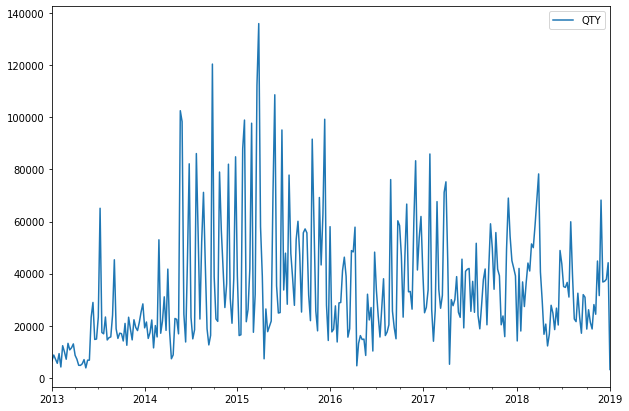

In [24]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7
#plt.figure(figsize = (12, 9))
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import datetime

wallFeature_matrix = pd.DataFrame()
wallLabel_matrix = pd.DataFrame()
wall_sp_num = 0
year_dic = {2013:0, 2014:1, 2015:2, 2016:3, 2017:4, 2018:5, 2019:6}
rem_list = list()
add_list = list()

arr = list()
wall_l = ['A','B','C','D','E','F','G','H','I','K','L','P','Q','R','S','T','V','W','Y']

for sp in wall_datas.keys():
    
    ######### Total sales #########
    
    sales = wall_datas[sp].filter(['CDateTime','QTY'], axis=1)   # extract 2 columns
    sales_aggre = sales.groupby('CDateTime').agg({'QTY':'sum'})  # group per day

    t_index = pd.DatetimeIndex(start='2013-01-01', end='2018-12-31', freq='1D')
    sales_aggre = sales_aggre.reindex(t_index).fillna(0)

    sales_aggre = sales_aggre.QTY.resample('W').sum()       # convert daily to weekly
    sales_aggre = pd.DataFrame(sales_aggre)
    sales_aggre.plot()
    break

    nonzero_weeks = (sales_aggre['QTY'] != 0).sum()  # Check whether salespoint has data of atleast 24 weeks(6 months). If not, remove that salespoint
    if (nonzero_weeks < 24):
        rem_list.append(sp)
        continue
    add_list.append('Is'+sp[5:])
    
    ################################
    
    ###### Weeks to New year ######
    w1 = sales_aggre.index.week
    w2 = list()
    yearNow=2013
    weeks_per_year=52
    newyear_week = datetime.date(2013, 4, 14).isocalendar()[1]  # Find the new year week
    con = True
    
    for i in range(len(w1)):
        if (con):
            x = newyear_week - w1[i]
        else:
            x = newyear_week + (weeks_per_year-w1[i])
            if (w1[i]==weeks_per_year):
                con=True
        if (x==0):
            weeks_per_year = datetime.date(yearNow, 12, 28).isocalendar()[1]
            newyear_week = datetime.date(yearNow+1, 4, 14).isocalendar()[1]
            yearNow += 1
            con=False
        w2.append(x)
    ################################
    
    ###### Weeks to Christmas ######
    w3 = list()
    yearNow=2013
    christmas_week = datetime.date(2013, 12, 25).isocalendar()[1]  # Find the Christmas week
    con = True
    
    for i in range(len(w1)):
        if (con==True):
            y = christmas_week - w1[i]
        else:
            y = christmas_week
            con=True
        if (y==0):
            if (w1[i]<datetime.date(yearNow+1, 1, 1).isocalendar()[1]):
                con=False
            christmas_week = datetime.date(yearNow+1, 12, 25).isocalendar()[1]
            yearNow += 1
        w3.append(y)
    ################################
    
    ################### Feature matrix & Label matrix ##################
    
    ################### Year, Month, Week ####################
    
    wall_features = pd.DataFrame(index=sales_aggre.index)     # wall_features dataframe stores all the features for one salespoint
        
    wall_features['Year'] = pd.Series(sales_aggre.index.year, index=wall_features.index)     # Year
    labelencoder = LabelEncoder()
    wall_features.iloc[:, 0] = labelencoder.fit_transform(wall_features.iloc[:, 0])  # Label encoded the year
     
    df_month = pd.DataFrame(sales_aggre.index.month)                # Month
    onehotencoder = OneHotEncoder(categorical_features = [0])
    array_month = onehotencoder.fit_transform(df_month).toarray()  # One hot encoded the 12 months
    df_month = pd.DataFrame(array_month, columns=['IsJan','IsFeb','IsMar','IsApr','IsMay','IsJun','IsJul','IsAug','IsSep','IsOct','IsNov','IsDec']).astype('int')
    df_month.index = wall_features.index
    wall_features = pd.concat([wall_features, df_month], axis=1)
        
    df_week = pd.DataFrame(sales_aggre.index.week)                       # Week
    onehotencoder1 = OneHotEncoder(categorical_features = [0])
    array_week = onehotencoder.fit_transform(df_week).toarray()  # One hot encoded the 53 weeks
    df_week = pd.DataFrame(array_week, columns=[('Isweek '+str(i)) for i in range(1,54)]).astype('int')
    df_week.index = wall_features.index
    wall_features = pd.concat([wall_features, df_week], axis=1)
    
    ##########################################################
    
    wall_features['WeeksToNewyear'] = w2    
    wall_features['WeeksToChristmas'] = w3
    
    ################ Channel behavior & QTYs ################
    
    subFrame = wall_datas[sp].filter(['CDateTime','SalesChannelKey','ItemSize','QTY'], axis=1)    # extract 4 columns
    weeks = [g for n, g in subFrame.set_index('CDateTime').groupby(pd.Grouper(freq='W'))]    # create weekly dataframes
    start_year = (subFrame['CDateTime'].dt.year).iloc[0]
    start_week_of_year = (subFrame['CDateTime'].dt.week).iloc[0]
    weeks_of_before_years = 0
    
    for i in range(0, year_dic[start_year]):
        weeks_per_year = datetime.date(list(year_dic.keys())[list(year_dic.values()).index(i)], 12, 28).isocalendar()[1]  #list(year_dic.keys())[list(year_dic.values()).index(0)]
        weeks_of_before_years = weeks_of_before_years + weeks_per_year
    start_week = weeks_of_before_years + start_week_of_year
    print (wall_sp_num+1, sp, start_week)
        
    #counts = [[weeks[i]['SalesChannelKey'].value_counts(normalize=True)] for i in range(len(weeks))]     # customer cat. percents for each week
    
    wall_chan = np.zeros((sales_aggre.shape[0], 11))       # matrix for store channel percentages for each week (one salespoint)
    
    wall_keys = ['WallTiles A','WallTiles B','WallTiles C','WallTiles D','WallTiles E','WallTiles F','WallTiles G','WallTiles H','WallTiles I',
                'WallTiles K','WallTiles L','WallTiles P','WallTiles Q','WallTiles R','WallTiles S','WallTiles T',
                'WallTiles V','WallTiles W','WallTiles Y']
    
    wall_dic = dict.fromkeys(wall_keys, None)      # dictionary for store QTY of group categories(labels) for each week (one salespoint)
    for key in wall_keys:
        wall_dic[key] = [0]*len(sales_aggre)    
        
    ############# Channel behavior ##############
    
    for week in range(len(weeks)):
        
        counts = [weeks[week]['SalesChannelKey'].value_counts(normalize=True)]  # Give channel percentages for week 
        countPcnt = counts[0].tolist()  # Percentage values
        cusCat = counts[0].index   # Channel names
        
        for i in range(len(cusCat)):
            wall_chan[start_week-1][int(cusCat[i])+1] = countPcnt[i]      # add percentages to a matrix
            
    ##############################################
            
    ###### QTY for group categories(labels) ######
        
        wall_table = pd.pivot_table(weeks[week], values='QTY', index=['ItemSize'], aggfunc=sum)  # Give total QTY for each wall tile sizes(for week)

        for wall in wall_table.index:
            wall_dic['WallTiles '+wall.upper()][start_week-1] = wall_dic['WallTiles '+wall.upper()][start_week-1] + wall_table.xs((wall))[0] # Store total QTYs in a dictioanary
        
        start_week += 1
    
    wall_labels = pd.DataFrame.from_dict(wall_dic)  # outputs dataframe for salespoint
    '''
    ############
    dfstd=pd.DataFrame(wall_labels.std())
    for i in range(19):
        arr.append(dfstd.values.tolist()[i][0])
    
    plt.plot(wall_l, arr)
    plt.title('Salespoint '+sp[5:])
    plt.xlabel('Wall tile type')
    plt.ylabel('Standard deviation')
    plt.show()
    arr = list()
    ############
    '''
    wallLabel_matrix = pd.concat([wallLabel_matrix, wall_labels])     # matrix for store labels of all salespoints
    
    ##############################################
    
    Sales_channels = ['Other','Other1','Consignment Agent','Distributors','Direct Dealers/Colombo Dealers','Direct Sales','Franchise Dealers',
                      'Lanka Tiles Plus','Projects','Royal Sales','Regional Sales']
    
    for i in range(11):
        wall_features[Sales_channels[i]] = wall_chan[:, i]  # Add channel percentage features
        
    del wall_features[Sales_channels[1]]  # These deleted channels haven't data
    del wall_features[Sales_channels[4]]
    del wall_features[Sales_channels[7]]
    del wall_features[Sales_channels[9]]
    del wall_features[Sales_channels[10]]
    
    ########################################################
    
    ################### Invoice discount ###################
    
    wall_invDiscount = wall_datas[sp].filter(['CDateTime','DiscountPcnt'], axis=1)   # extract date and invoice discount columns
    wall_invDiscount_aggre = wall_invDiscount.groupby('CDateTime').agg({'DiscountPcnt':'mean'})  # Group per day
    
    wall_invDiscount_aggre = wall_invDiscount_aggre.reindex(t_index).fillna(0)
    wall_invDiscount_aggre = wall_invDiscount_aggre.DiscountPcnt.resample('W').mean()       # convert daily to weekly
    
    wall_features['Invoice Discount'] = wall_invDiscount_aggre     # invoice discount
    
    ########################################################

    wall_sales_p = [wall_sp_num] * len(sales_aggre)
    wall_features['Salespoint'] = wall_sales_p      # Add salespoint name as a feature until doing one hot encoding for salespoint names
    
    wall_features['QTY_sum'] = sales_aggre['QTY']  # Total sales for the week

    wallFeature_matrix = pd.concat([wallFeature_matrix, wall_features])    # matrix for store features of all salespoints
    
    wall_sp_num += 1

del (wallFeature_matrix['Isweek 53'])

In [70]:
'''
numpy_fullArr = np.array(fullArr)
print (numpy_fullArr)
numpy_fullArrVar = np.array(fullArrVar)
print (numpy_fullArrVar)

l = [i for i in range(1,91)]
for i in range(21):
    plt.plot(l, numpy_fullArr[:,i])
    plt.show()
'''

[[2.46229444e+03 5.64842289e+02 7.12712210e+01 ... 8.49824421e+03
  7.90065707e+00 1.34795971e+03]
 [8.88961461e+01 3.49886242e+00 0.00000000e+00 ... 5.29600518e+02
  0.00000000e+00 0.00000000e+00]
 [2.86208876e+01 0.00000000e+00 0.00000000e+00 ... 2.80741672e+02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.07653091e+04 3.46160090e+02 0.00000000e+00 ... 7.92045742e+03
  9.79710090e+02 0.00000000e+00]
 [2.45375751e+02 5.64332648e-02 0.00000000e+00 ... 1.46435042e+03
  0.00000000e+00 0.00000000e+00]
 [3.73751739e+04 5.19093916e+02 7.96810965e-02 ... 8.64590106e+04
  4.72111533e+03 2.74697619e+00]]


In [15]:
############### Salespoint columns ###############

walldf_sp = pd.DataFrame(wallFeature_matrix['Salespoint'].values)
onehotencoder2 = OneHotEncoder(categorical_features = [0])
wallarray_sp = onehotencoder2.fit_transform(walldf_sp).toarray()  # One hot encoded the salespoint column
walldf_sp = pd.DataFrame(wallarray_sp, columns=add_list).astype('int')
walldf_sp.index = wallFeature_matrix.index
wallFeature_matrix = pd.concat([wallFeature_matrix, walldf_sp], axis=1)
del wallFeature_matrix['Salespoint']

##################################################

wallLabel_matrix.index = wallFeature_matrix.index
#print (wallFeature_matrix)
#print (wallLabel_matrix)
#print (label_matrix.loc[:, 'ACCESSORIES':'TIMBER - PARQUE'])
#print (label_matrix.loc[:, 'FloorTiles A':'FloorTiles Y'])
#print (label_matrix.loc[:, 'WallTiles A':'WallTiles Y'])

In [120]:
print (wallLabel_matrix)

            WallTiles A  WallTiles B  WallTiles C  WallTiles D  WallTiles E  \
2013-01-06          0.0          0.0         30.0       5613.0          0.0   
2013-01-13          0.0          0.0          0.0       6487.0          0.0   
2013-01-20          0.0          0.0          0.0       4396.0          0.0   
2013-01-27          0.0          0.0          0.0       3589.0          0.0   
2013-02-03          0.0          0.0          0.0       4690.0          0.0   
...                 ...          ...          ...          ...          ...   
2018-12-09          0.0          0.0          0.0          0.0          0.0   
2018-12-16          0.0          0.0          0.0          0.0          0.0   
2018-12-23          0.0          0.0          0.0          0.0          0.0   
2018-12-30          0.0          0.0          0.0          0.0          0.0   
2019-01-06          0.0          0.0          0.0          0.0          0.0   

            WallTiles F  WallTiles G  WallTiles H  

In [16]:
wall_df_old = pd.concat([wallFeature_matrix, wallLabel_matrix], axis=1)
#print (wall_df_old)
#print ((wall_df_old['QTY_sum'] != 0).sum())
wall_df0 = wall_df_old[wall_df_old.QTY_sum != 0]  # Remove the data points which have 0 sales for the week
#print (wall_df0)
del wall_df0['QTY_sum']
wall_df0 = wall_df0.reset_index(drop=True)
wall_df = wall_df0.sample(frac=1).reset_index(drop=True)     # shuffled
#print (wall_df)

In [85]:
print (wall_df['Invoice Discount'].mean())

4.359068945911009


[Text(0.5, 0, 'Year'),
 Text(3.5, 0, 'IsMar'),
 Text(6.5, 0, 'IsJun'),
 Text(9.5, 0, 'IsSep'),
 Text(12.5, 0, 'IsDec'),
 Text(15.5, 0, 'Isweek 3'),
 Text(18.5, 0, 'Isweek 6'),
 Text(21.5, 0, 'Isweek 9'),
 Text(24.5, 0, 'Isweek 12'),
 Text(27.5, 0, 'Isweek 15'),
 Text(30.5, 0, 'Isweek 18'),
 Text(33.5, 0, 'Isweek 21'),
 Text(36.5, 0, 'Isweek 24'),
 Text(39.5, 0, 'Isweek 27'),
 Text(42.5, 0, 'Isweek 30'),
 Text(45.5, 0, 'Isweek 33'),
 Text(48.5, 0, 'Isweek 36'),
 Text(51.5, 0, 'Isweek 39'),
 Text(54.5, 0, 'Isweek 42'),
 Text(57.5, 0, 'Isweek 45'),
 Text(60.5, 0, 'Isweek 48'),
 Text(63.5, 0, 'Isweek 51'),
 Text(66.5, 0, 'WeeksToChristmas'),
 Text(69.5, 0, 'Distributors'),
 Text(72.5, 0, 'Projects'),
 Text(75.5, 0, 'IsCABLM'),
 Text(78.5, 0, 'IsCAGOG'),
 Text(81.5, 0, 'IsCAMTG'),
 Text(84.5, 0, 'IsDBALU'),
 Text(87.5, 0, 'IsDBBAN'),
 Text(90.5, 0, 'IsDBDIG'),
 Text(93.5, 0, 'IsDBHOR'),
 Text(96.5, 0, 'IsDBKEG'),
 Text(99.5, 0, 'IsDBMAT'),
 Text(102.5, 0, 'IsDBNAR'),
 Text(105.5, 0, 'IsDBPE

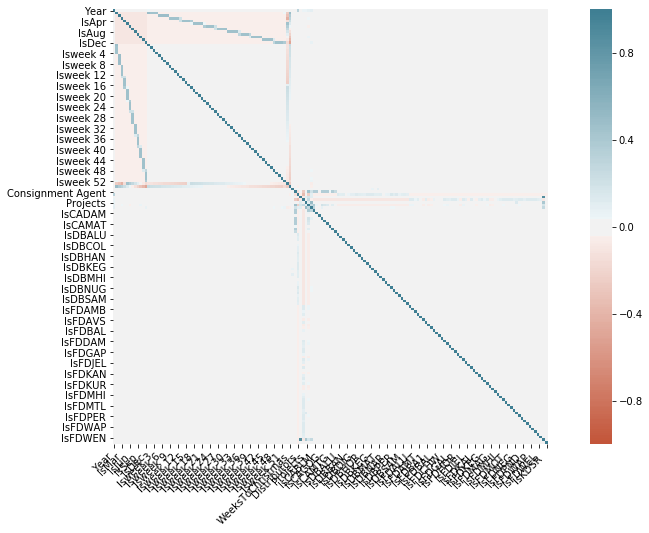

In [22]:
#################### Heat map ####################
  
corr = wallFeature_matrix.corr()           
#print (corr) 
#corr.style.background_gradient(cmap='coolwarm')
#plt.show()
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

##################################################

<Figure size 10800x8400 with 0 Axes>

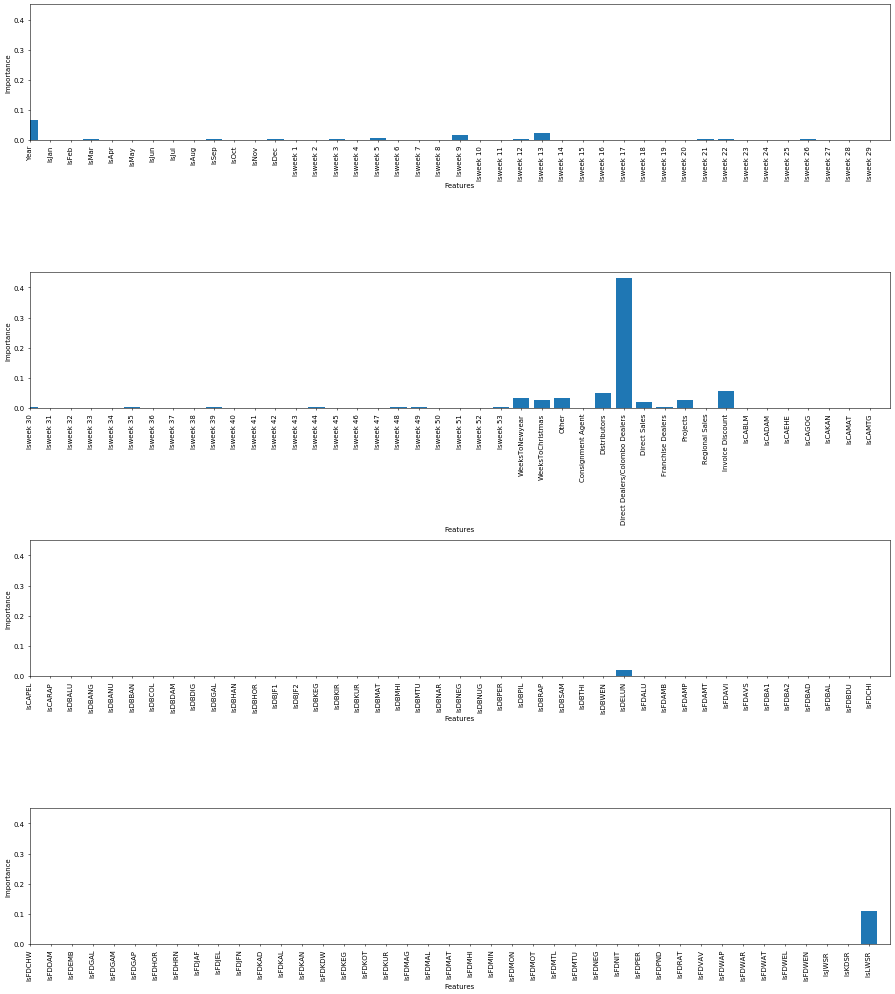

In [24]:
############# Feature importance #############

rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(18,14), dpi=600)

array = wall_df.values
X = array[:,0:167]
y = array[:,167:]

model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)
#print(model.feature_importances_)
values = model.feature_importances_

Names = wall_df.columns.values[0:167]

N=42
sublists_names = [Names[x:x+N] for x in range(0, len(Names), N)]
sublists_values = [values[x:x+N] for x in range(0, len(values), N)]

size = int(len(values))
fig, axs = plt.subplots(nrows=size//N+1, sharey=True, figsize=(18,20), dpi=50)

#fig.suptitle('Graph', 
#          **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'})

for ax, fea_names, imp_values in zip(axs, sublists_names, sublists_values):
    ax.bar(range(len(imp_values)), imp_values, align='center')
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_xticks(range(len(fea_names)))
    ax.set_xticklabels(fea_names, rotation='vertical')
    ax.set_xlim(0, len(fea_names))

fig.subplots_adjust(bottom=0.00, top=0.95)
plt.show()

###############################################

[0.5759161815653925, 2209.566561326155, 3966.4240838184346, 238.25310890743066, 12030.039060220766, 63.14126954564691]
1.0
[3.1117148344791035e-05, 0.11938440465345553, 0.2143086278268011, 0.012872979733489878, 0.6499913043127711, 0.0034115663251376113]


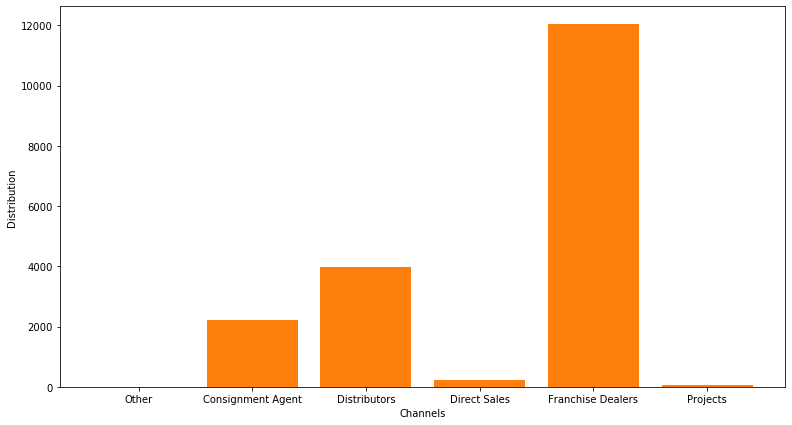

Text(0, 0.5, 'Distribution')

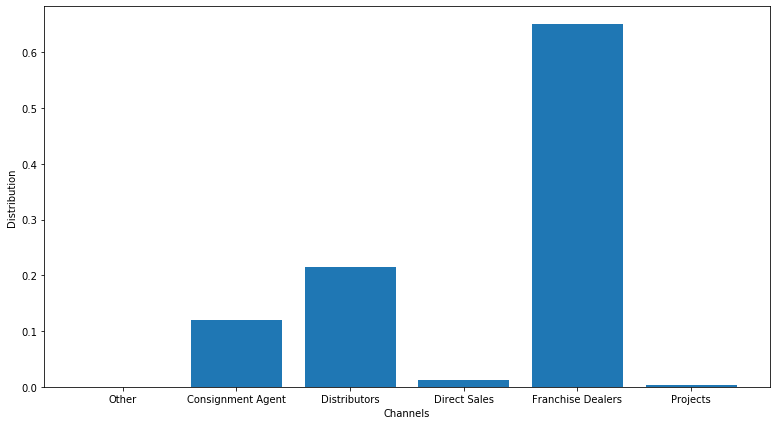

In [87]:
########## Channel distribution ##########
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 7

sales_channels = ['Other','Consignment Agent','Distributors','Direct Sales','Franchise Dealers','Projects']

total = list()
for i in sales_channels:
    total.append(wall_df[i].sum())
    
print (total)
distribution = [x/sum(total) for x in total]
print (sum(distribution))
print (distribution)
plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
plt.bar(sales_channels, total)
plt.show()

plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
##########################################

[0.5759161815653925, 2207.5665613261554, 3908.424083818434, 0.0, 238.25310890743066, 12024.039060220766, 63.14126954564691, 0.0]
[3.122851000788377e-05, 0.11970320796693175, 0.21193059775612375, 0.0, 0.012919049393093518, 0.6519921407776145, 0.003423775596228549, 0.0]


Text(0, 0.5, 'Distribution')

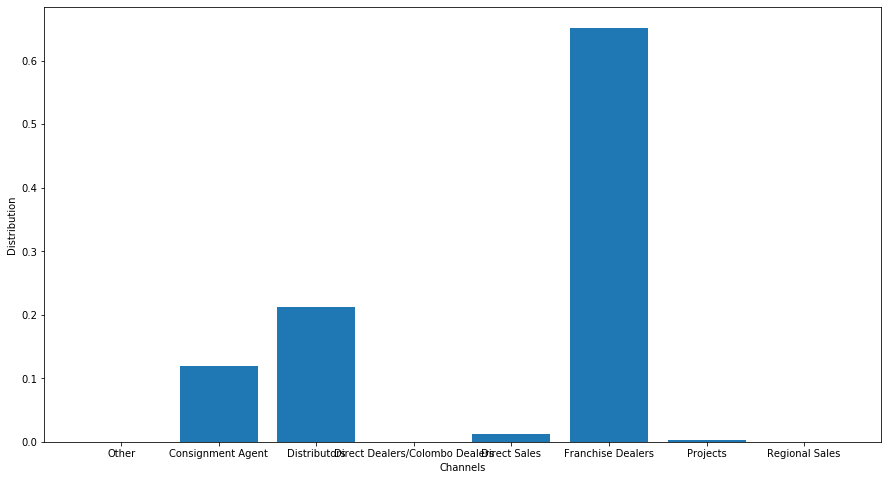

In [54]:
########## Channel distribution ##########
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

sales_channels = ['Other','Consignment Agent','Distributors','Direct Dealers/Colombo Dealers','Direct Sales','Franchise Dealers',
                  'Projects','Regional Sales']

total = list()
for i in sales_channels:
    total.append(wall_df[i].sum())
    
print (total)
distribution = [x/sum(total) for x in total]
print (distribution)
plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
##########################################

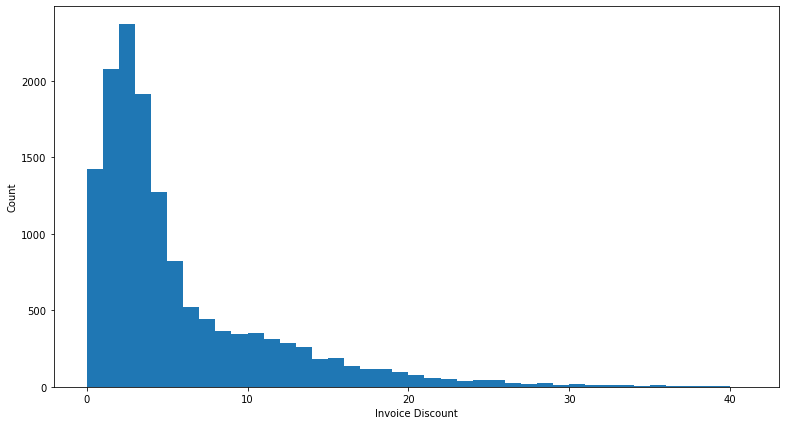

In [89]:
######### Histogram for invoice discount #########
rcParams['figure.figsize'] = 13, 7

di=pd.DataFrame()
di['Discount'] = wall_df['Invoice Discount']
y = di[di.Discount != 0]
x = y['Discount']
plt.hist(x, range=[0,41], bins=41) 
#plt.title(channel) 
plt.xlabel('Invoice Discount') 
plt.ylabel("Count")
plt.show()
###################################################   

In [18]:
print (len(wallFeature_matrix.columns))
print (len(wallLabel_matrix.columns))

163
19


In [20]:
from sklearn.model_selection import train_test_split 

array = wall_df.values
X = array[:,0:162]
y = array[:,162:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)        

In [123]:
print (X.shape)

(18508, 163)


In [21]:
######### Use the saved model and predict #########
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.externals import joblib 

RandomForest = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Walltiles_RFmodelNew.pkl')  

#X_test = X_val[1].reshape(1, -1)
y_pred_val = RandomForest.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
#print (y_pred)
#y_pred_arr = y_pred.tolist()

dic_val = {'Actual':y_val[500:601,5], 'Predicted':y_pred_val[500:601,5]}
df_val = pd.DataFrame(dic_val)

#df_val=df_val.drop([4])
#print (df_val[0:50])
#print (df_val[50:101])

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
##################################################

ValueError: Number of features of the model must match the input. Model n_features is 164 and input n_features is 162 

In [187]:
#wall_df.to_pickle("./Walltiles_df.pkl")

In [ ]:
############## Linear Regression ##############
'''
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_val = regressor.predict(X_val)

dic_train = {'Actual':y_train[0:50,1], 'Predicted':y_pred_train[0:50,1]}
dic_val = {'Actual':y_val[0:50,0], 'Predicted':y_pred_val[0:50,0]}

df_train = pd.DataFrame(dic_train)
#print (df_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

df_val = pd.DataFrame(dic_val)
#print (df_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

plt.plot(df_train['Actual'])
plt.plot(df_train['Predicted'], color='red')
plt.show()

plt.plot(df_val['Actual'])
plt.plot(df_val['Predicted'], color='red')
plt.show()
'''
################################################

In [146]:
################# Random Forest #################

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750]
#max_features = ['auto', 'sqrt'] 
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]         # Maximum number of levels in tree   
#max_depth.append(None)
#in_samples_split = [2, 5, 10]
#in_samples_leaf = [1, 2, 4] 
#bootstrap = [True, False]

for x in num_of_trees:
    regressor = RandomForestRegressor(n_estimators=x)
    regressor.fit(X_train, y_train)

    y_pred_train = regressor.predict(X_train)
    y_pred_val = regressor.predict(X_val)

    print ('num_of_trees: '+str(x))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_train)
    print (rmse_val)
    print ('\n')
    
    '''
    dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
    dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}

    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)

    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()
    '''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
#################################################

num_of_trees: 10
Root Mean Squared Error: 582.0672556275977
Root Mean Squared Error: 1184.301934606077
[582.0672556275977]
[1184.301934606077]


num_of_trees: 20
Root Mean Squared Error: 537.2843425662834
Root Mean Squared Error: 1177.6526596222798
[582.0672556275977, 537.2843425662834]
[1184.301934606077, 1177.6526596222798]




KeyboardInterrupt: 

In [53]:
######## Save the selected model as a pickle file ########
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib 
  
regressor = RandomForestRegressor(n_estimators=240, max_depth=60)
regressor.fit(X_train, y_train)
    
# Save the model as a pickle in a file 
joblib.dump(regressor, 'C:/Users/ChamithM/Desktop/Bestmodels/Walltiles_RFmodelNew.pkl')  
  
# Load the model from the file 
RandomForest = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Walltiles_RFmodelNew.pkl')
  
# Use the loaded model to make predictions 
y_pred_train = RandomForest.predict(X_train)
y_pred_val = RandomForest.predict(X_val)

print('Training set RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Validation set RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
##########################################################

Training set RMSE: 474.07778792005917
Validation set RMSE: 729.322121206984


In [ ]:
############# Multilayer Perceptron #############

from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
num_of_neurons = [16, 32, 64, 128, 256, 512, 1024]

for neurons in num_of_neurons:

    mlp = MLPRegressor(hidden_layer_sizes=(neurons,), activation='relu', random_state=0)
    mlp.fit(X_train, y_train)

    y_pred_train = mlp.predict(X_train)
    y_pred_val = mlp.predict(X_val)
 
    print ('layer size: '+str(neurons))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print ('\n')
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_train)
    print (rmse_val)
    
    dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
    dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}
    
    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)
    df_val = df_val.drop([3])
    df_val = df_val.drop([31])
    
    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

df_RF = pd.DataFrame({'No of neurons':num_of_neurons, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of neurons')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of neurons')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#################################################

In [93]:
############## Gradient Boosting ################

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750, 1000]

for trees in num_of_trees:

    gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=trees))
    gbr.fit(X_train, y_train)

    y_pred_train = gbr.predict(X_train)
    y_pred_val = gbr.predict(X_val)

    print ('num of trees: '+str(trees))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print ('\n')
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_val)
    print (rmse_train)
    '''
    dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
    dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}
    
    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)
    df_val = df_val.drop([3])
    df_val = df_val.drop([31])
    #print (df_val)
    
    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()
    '''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
##################################################

num of trees: 10
Root Mean Squared Error: 1089.100823023719
Root Mean Squared Error: 1500.2069631810268


[1500.2069631810268]
[1089.100823023719]
num of trees: 20
Root Mean Squared Error: 937.9142903825185
Root Mean Squared Error: 1461.939371635249


[1500.2069631810268, 1461.939371635249]
[1089.100823023719, 937.9142903825185]
num of trees: 50
Root Mean Squared Error: 821.9701618989209
Root Mean Squared Error: 1440.463403679507


[1500.2069631810268, 1461.939371635249, 1440.463403679507]
[1089.100823023719, 937.9142903825185, 821.9701618989209]
num of trees: 75
Root Mean Squared Error: 786.5451020805979
Root Mean Squared Error: 1448.8014582724254


[1500.2069631810268, 1461.939371635249, 1440.463403679507, 1448.8014582724254]
[1089.100823023719, 937.9142903825185, 821.9701618989209, 786.5451020805979]
num of trees: 100
Root Mean Squared Error: 760.8005225921856
Root Mean Squared Error: 1448.5476369105368


[1500.2069631810268, 1461.939371635249, 1440.463403679507, 1448.8014582724254,

KeyboardInterrupt: 

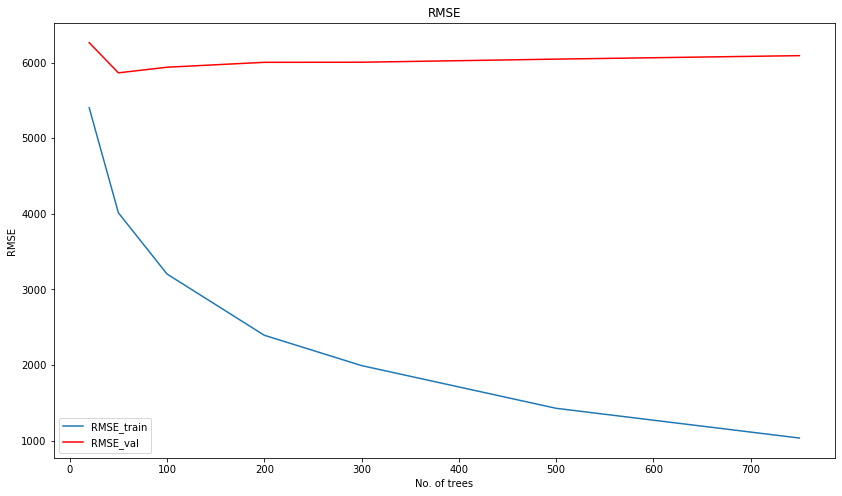

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

num_of_trees = [20, 50, 100, 200, 300, 500, 750]
rmse_train = [5402, 4013, 3203, 2393, 1992, 1427, 1034]
rmse_val = [6262.780920045128, 5863.927855939482, 5938.399435582377, 6003.073637788552, 6004.259943576276, 6045.3760860473385, 6091.385580433585]

df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
############### Adaptive Boosting ################

#from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
num_of_trees = [5, 10, 20, 50, 75, 100, 200, 300, 500, 750, 1000]

for trees in num_of_trees:

    abr = MultiOutputRegressor(AdaBoostRegressor(n_estimators=trees, random_state=0))
    print (X_train.shape, y_train.shape)
    abr.fit(X_train, y_train)

    y_pred_train = abr.predict(X_train)
    y_pred_val = abr.predict(X_val)

    print ('layer size: '+str(trees))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print ('\n')
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_val)
    
    dic_train = {'Actual':y_train[0:101,3], 'Predicted':y_pred_train[0:101,3]}
    dic_val = {'Actual':y_val[0:101,3], 'Predicted':y_pred_val[0:101,3]}
    
    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)
    #df_val = df_val.drop([47])
    #print (df_val)
    
    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()

##################################################

In [148]:
print (y.shape)

(18508, 19)


In [151]:
############ Neural Network #############

from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(650, input_dim=163, activation= "relu"))
model.add(Dense(324, activation= "relu"))
model.add(Dense(160, activation= "relu"))
model.add(Dense(19))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

y_pred_train= model.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_val= model.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
'''
dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}
    
df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)
df_val = df_val.drop([3])
df_val = df_val.drop([31])
df_val = df_val.drop([80])

#df_train = df_train.drop([47])
#df_train = df_train.drop([81])
#df_val = df_val.drop([65])
#df_val = df_val.drop([71])

#print (df_train.iloc[80:101])
#print (df_val.iloc[51:101])
   
plt.plot(df_train['Actual'], label='Actual')
plt.plot(df_train['Predicted'], color='red', label='Predicted')
plt.title('Training Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
'''
#########################################

Epoch 1/40
16657/16657 [==============================] - 7s 402us/step - loss: 2764878.2223 - mean_squared_error: 2764878.0000
Epoch 2/40
16657/16657 [==============================] - 5s 277us/step - loss: 2569650.0165 - mean_squared_error: 2569651.0000
Epoch 3/40
16657/16657 [==============================] - 5s 312us/step - loss: 2453258.9649 - mean_squared_error: 2453258.7500
Epoch 4/40
16657/16657 [==============================] - 6s 333us/step - loss: 2334226.6953 - mean_squared_error: 2334227.5000
Epoch 5/40
16657/16657 [==============================] - 5s 313us/step - loss: 2167310.7031 - mean_squared_error: 2167311.5000
Epoch 6/40
16657/16657 [==============================] - 5s 277us/step - loss: 2004135.7562 - mean_squared_error: 2004135.8750
Epoch 7/40
16657/16657 [==============================] - 4s 268us/step - loss: 1764549.8360 - mean_squared_error: 1764549.6250
Epoch 8/40
16657/16657 [==============================] - 5s 274us/step - loss: 1658064.1548 - mean_squa

"\ndic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}\ndic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}\n    \ndf_train = pd.DataFrame(dic_train)\ndf_val = pd.DataFrame(dic_val)\ndf_val = df_val.drop([3])\ndf_val = df_val.drop([31])\ndf_val = df_val.drop([80])\n\n#df_train = df_train.drop([47])\n#df_train = df_train.drop([81])\n#df_val = df_val.drop([65])\n#df_val = df_val.drop([71])\n\n#print (df_train.iloc[80:101])\n#print (df_val.iloc[51:101])\n   \nplt.plot(df_train['Actual'], label='Actual')\nplt.plot(df_train['Predicted'], color='red', label='Predicted')\nplt.title('Training Set')\nplt.xlabel('data points')\nplt.ylabel('Actual and Predicted')\nplt.legend()\nplt.show()\n\nplt.plot(df_val['Actual'], label='Actual')\nplt.plot(df_val['Predicted'], color='red', label='Predicted')\nplt.title('Validation Set')\nplt.xlabel('data points')\nplt.ylabel('Actual and Predicted')\nplt.legend()\nplt.show()\n"